# Python introduction - session 4 
## Learning about the real power of python with modules
## Biopython, pandas, matplotlib and bedtools wrapped into the jupyter

If you get stuck in an endless loop hit the **"STOP" button (black square)** above or our good friend from bash, **ctrl+c**  
You know you are stuck in a loop if you see **In \[\*\]:** forever

### Installation reminder

If you want to install this whole tool stack on your own machine we recommend the following.

#### Windows

* Install the [Ubuntu subsystem](https://docs.microsoft.com/en-us/windows/wsl/install-win10)
* Install the Linux version of [Anaconda](https://www.anaconda.com/products/individual) into your subsystem.
* Setup [Bioconda](https://bioconda.github.io/) in your subsystem
* Install programs and modules like...

``conda install biopython``

#### Mac

* Install the Mac version of [Anaconda](https://www.anaconda.com/products/individual) on your command line/terminal.
* Setup [Bioconda](https://bioconda.github.io/) on your command line/terminal.
* Install programs and modules like...

``conda install biopython``

### Objectives

* Interogate larger dataset using biopython and pandas.
* Use pandas to combine larger datasets.
* Plot expression profiles across multiple condiditions in Arabidopsis.
* Extract promoter sequences of highly expressed genes.
* Analyze the composition of promoter sequences to identify motifs.

## Reminder: Python objects are like cats and dogs

In [1]:
%matplotlib inline
from IPython.display import Image

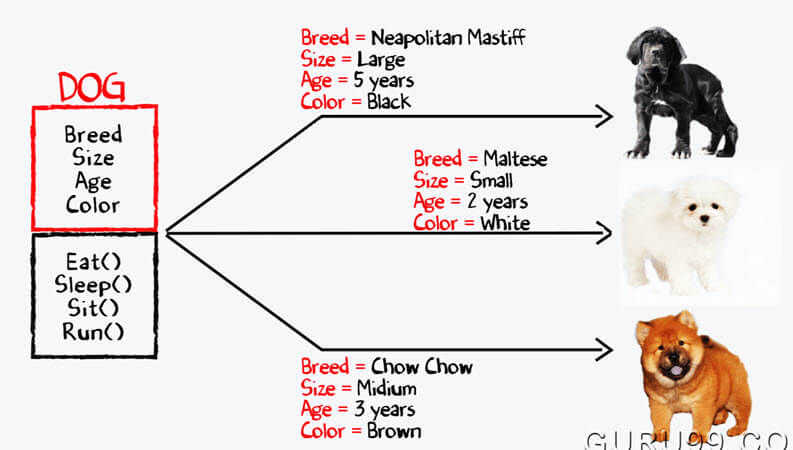

In [2]:
Image(filename='./figures/dogs_as_objects.jpg')

### Intro to [Biopython](https://biopython.org/wiki/Documentation)

* We will download the complete [Arabidopsis](https://www.arabidopsis.org/index.jsp) coding sequences.
* We will read them all in at once.
* We will translate them all into protein sequences.
* We will calcualte their pi values.
* We will do some basic plotting.

#### Let's download sequences from [here](https://www.arabidopsis.org/download/index-auto.jsp?dir=%2Fdownload_files%2FGenes%2FAraport11_genome_release%2FAraport11_blastsets)

In [ ]:
!wget https://www.arabidopsis.org/download_files/Genes/Araport11_genome_release/Araport11_blastsets/Araport11_genes.201606.cds.fasta.gz

In [ ]:
!gunzip Araport11_genes.201606.cds.fasta.gz

In [ ]:
!head Araport11_genes.201606.cds.fasta

## Let's reconstruct out lists from last time for all CDS in Arabidopsis

In [48]:
from Bio import SeqIO
from Bio.SeqUtils import IsoelectricPoint as IP
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
filename = 'Araport11_genes.201606.cds.fasta'

In [5]:
## Read in all CDS as list (ordered!)
arabidopsis_cds = []
for seq in SeqIO.parse(filename, 'fasta'):
    arabidopsis_cds.append(seq)    

In [6]:
###Let's make a cds length list and an ID list
cds_length = []
ID_list = []
for cds in arabidopsis_cds:
    cds_length.append(len(cds.seq))
    ID_list.append(cds.id)

In [10]:
###Let's make a protein list and a protein length list
arabidopsis_proteins = []
protein_length = []
for cds in arabidopsis_cds:
    tmp_protein = cds.translate() #translate sequence
    tmp_protein.id = cds.id #add id to tmp_protein object
    tmp_protein.name = cds.name #add name to tmp_protein object 
    tmp_protein.description = cds.description #add description to tmp_protein object
    arabidopsis_proteins.append(tmp_protein) #store it
    protein_length.append(len(tmp_protein)) #store length

In [13]:
protein_pi_values = []
for protein in arabidopsis_proteins:
    tmp_protein = IP.IsoelectricPoint(protein.seq) #generate a Isoelectric point object to be able to calcuate pi values
    tmp_protein_pi = tmp_protein.pi() #calculate pi value
    protein_pi_values.append(tmp_protein_pi)

## Exercise I

* Make a dictionary called ara_dict
* the keys 'Gene_ID', 'CDS_length', 'protein_length', 'protein_pi_value'
* the values are the corresponding lists we generated above

In [14]:
ara_dict = {}
ara_dict['Gene_ID'] = ID_list
ara_dict['CDS_length'] = cds_length
ara_dict['protein_length'] = protein_length
ara_dict['protein_pi_value'] = protein_pi_values

### Intro to [pandas](https://pandas.pydata.org/)

pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language. 

* We will generate a dataframe (Table) from our own input data
* We will subset the dataframe to find the longest and shortes CDS in Arabidopsis
* We will caclulate the mean, median, and standard deviation for our dataset
* We will do some basic plotting.
* We will load some public expression datasets.
* We will interogate this dataset.
* We will pull out the promoters of the most highly expressed genes and look for a specific hormone response elements.

#### The two main objects in pandas 

* Series to store one dimensional data
* Dataframe to store two dimnesional data

See for a quick intro [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)

In [33]:
ara_df = pd.DataFrame.from_dict(ara_dict)

In [34]:
ara_df

,Gene_ID,CDS_length,protein_length,protein_pi_value
0,AT1G01010.1,1290,430,5.101379
1,AT1G01020.1,738,246,8.908997
2,AT1G01020.2,576,192,8.795715
3,AT1G01020.3,711,237,9.136292
4,AT1G01020.4,711,237,9.136292
...,...,...,...,...
48354,ATMG01350.1,438,146,4.690613
48355,ATMG01360.1,1584,528,7.786682
48356,ATMG01370.1,336,112,10.272400
48357,ATMG01400.1,318,106,10.078308


In [35]:
## look at the top
ara_df.head()

,Gene_ID,CDS_length,protein_length,protein_pi_value
0,AT1G01010.1,1290,430,5.101379
1,AT1G01020.1,738,246,8.908997
2,AT1G01020.2,576,192,8.795715
3,AT1G01020.3,711,237,9.136292
4,AT1G01020.4,711,237,9.136292


In [36]:
## look at the bottom
ara_df.tail()

,Gene_ID,CDS_length,protein_length,protein_pi_value
48354,ATMG01350.1,438,146,4.690613
48355,ATMG01360.1,1584,528,7.786682
48356,ATMG01370.1,336,112,10.272400
48357,ATMG01400.1,318,106,10.078308
48358,ATMG01410.1,615,205,9.579773


In [37]:
## Get the column index
ara_df.columns

Index(['Gene_ID', 'CDS_length', 'protein_length', 'protein_pi_value'], dtype='object')

In [38]:
## Get row index
ara_df.index

RangeIndex(start=0, stop=48359, step=1)

In [39]:
## Get specific columns
ara_df['Gene_ID']

0        AT1G01010.1
1        AT1G01020.1
2        AT1G01020.2
3        AT1G01020.3
4        AT1G01020.4
            ...     
48354    ATMG01350.1
48355    ATMG01360.1
48356    ATMG01370.1
48357    ATMG01400.1
48358    ATMG01410.1
Name: Gene_ID, Length: 48359, dtype: object

In [40]:
## Reset the index
ara_df.index = ara_df['Gene_ID']

In [41]:
## Drop a column
ara_df.drop('Gene_ID', axis=1)

,CDS_length,protein_length,protein_pi_value
Gene_ID,,,
AT1G01010.1,1290,430,5.101379
AT1G01020.1,738,246,8.908997
AT1G01020.2,576,192,8.795715
AT1G01020.3,711,237,9.136292
AT1G01020.4,711,237,9.136292
...,...,...,...
ATMG01350.1,438,146,4.690613
ATMG01360.1,1584,528,7.786682
ATMG01370.1,336,112,10.272400


In [42]:
## Drop a column inplace
ara_df.drop('Gene_ID', axis=1, inplace = True)

### A word about pandas axis

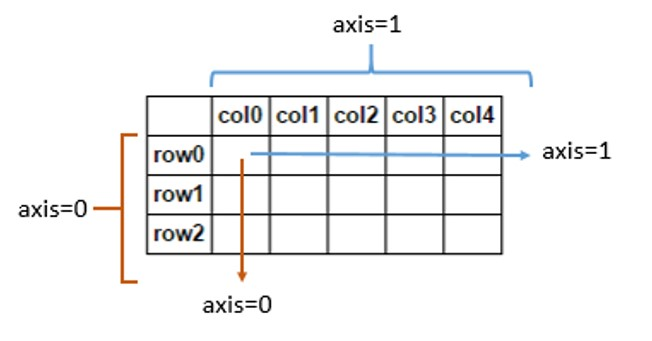

In [27]:
Image(filename='./figures/axis_pandas.jpg')

### Getting the mean, max, min, and such from a dataset

In [43]:
## maximum
ara_df['CDS_length'].max()

16203

In [53]:
## mean
ara_df['CDS_length'].mean()

1296.7666618416426

### Exercise II

* Get the mean value of protein_length column
* Get the max value of the protein_length column
* Get the standard deviation of the protein lenght column
* Get the mean value of the protein_pi_value column

### Plotting is your friend and build into pandas

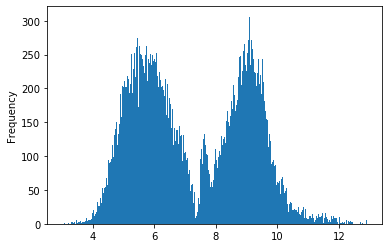

In [54]:
##histogram plot of protein_pi_value
ara_df['protein_pi_value'].plot.hist(bins=500)

Text(0.5, 0, 'PI value [pH]')

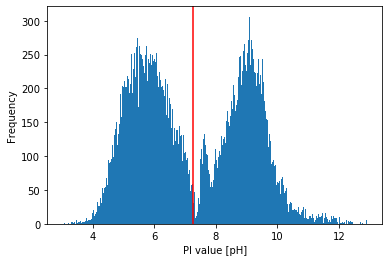

In [51]:
##histogram plot with horizontal line of the 
ara_df['protein_pi_value'].plot.hist(bins=500)
plt.axvline(ara_df['protein_pi_value'].mean(), c='r')
plt.xlabel('PI value [pH]')

## Always look at your distributions genome data is never?! normally distributed

### Subsetting your data

In [56]:
## CDS that are longer than the mean
ara_df['CDS_length'] > ara_df['CDS_length'].mean() 

Gene_ID
AT1G01010.1    False
AT1G01020.1    False
AT1G01020.2    False
AT1G01020.3    False
AT1G01020.4    False
               ...  
ATMG01350.1    False
ATMG01360.1     True
ATMG01370.1    False
ATMG01400.1    False
ATMG01410.1    False
Name: CDS_length, Length: 48359, dtype: bool

In [58]:
## Dataframe and Series have shapes
ara_df['CDS_length'].shape

(48359,)

In [60]:
## Dataframe and Series have shapes
ara_df.shape

(48359, 3)

In [59]:
(ara_df['CDS_length'] > ara_df['CDS_length'].mean()).shape

(48359,)

In [61]:
## Because comparisons return the same shaped boolean series we can use them to subset dataframes
ara_df[ara_df['CDS_length'] > ara_df['CDS_length'].mean()]

,CDS_length,protein_length,protein_pi_value
Gene_ID,,,
AT1G01040.1,5730,1910,5.877258
AT1G01040.2,5733,1911,5.877258
AT1G01060.1,1938,646,5.765198
AT1G01060.2,1938,646,5.765198
AT1G01060.3,1938,646,5.765198
...,...,...,...
ATMG00513.1,1446,482,7.583801
ATMG00520.1,2019,673,10.063538
ATMG00580.1,1488,496,9.274353


In [63]:
### We can also use boolean series to count
(ara_df['CDS_length'] > ara_df['CDS_length'].mean()).sum()

18702

### Exercise III

* How many proteins are longer than 1000 aa.
* How many CDS are longer than the mean plus two standard deviations.
* What is the mean length of proteins longer than 2000 aa.

### Let's look at some public Arabidopsis gene expression data after Auxin (a hormone) treatment

The paper is about gene expression after two different hormone treatments in Arabidopsis. We will use this to learn more about pandas and to extract promoters in the next session.

[Spatiotemporal Brassinosteroid Signaling and Antagonism with Auxin Pattern Stem Cell Dynamics in Arabidopsis Roots](https://www.sciencedirect.com/science/article/pii/S0960982215002158#mmc2) 

The basic treatments we are interested in are in the Columbia (WT) background:

* Auxin alone.
* Brassinosteroid alone.
* Auxin and Brassinosteroid (but this wasn't really in the supplement).


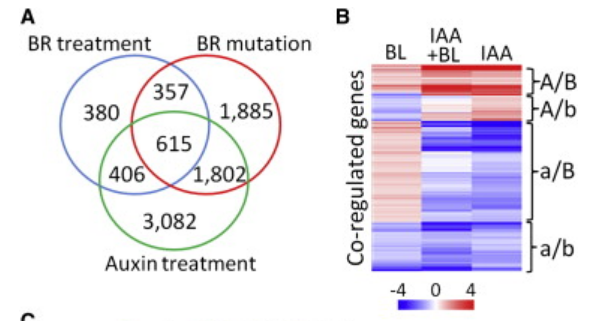

In [65]:
Image('./figures/Expression_analysis.png')

### This is how the data actually looks like

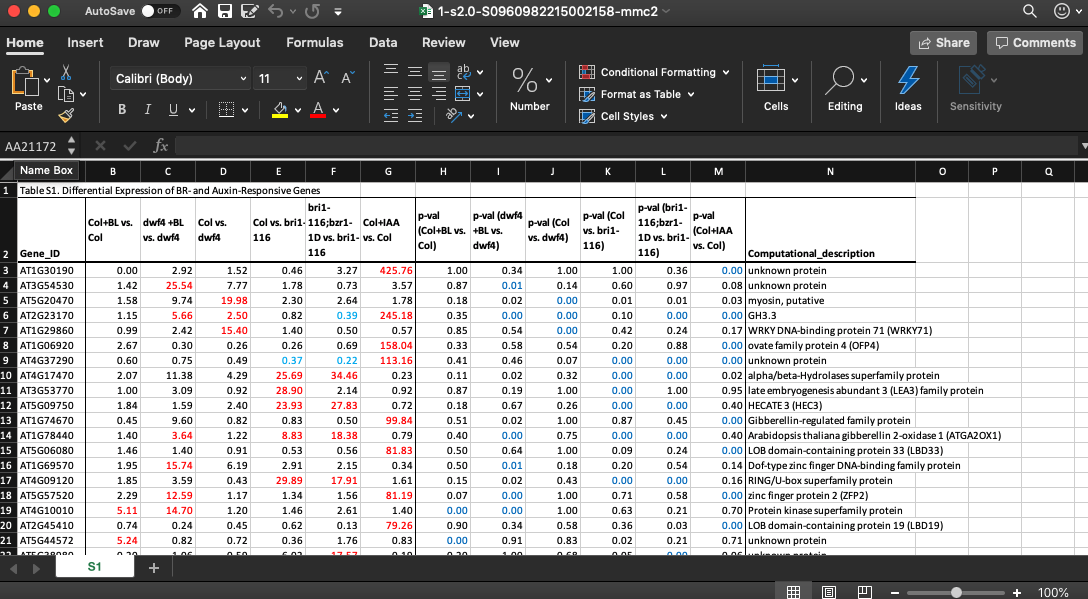

In [67]:
Image('figures/Excel_screenshot.png')

### Let's read in this excel table into pandas

In [68]:
?pd.read_excel

In [69]:
## Excel file name
excel_fn = 'datasets/1-s2.0-S0960982215002158-mmc2.xlsx'

In [74]:
### Read in excel file with specific spreadsheet and take care of excess row and index column
excel_df = pd.read_excel(excel_fn, sheet_name='S1', skiprows=1, index_col=0)

In [73]:
###Let's look at it
excel_df.head()

,Col+BL vs. Col,dwf4 +BL vs. dwf4,Col vs. dwf4,Col vs. bri1-116,bri1-116;bzr1-1D vs. bri1-116,Col+IAA vs. Col,p-val (Col+BL vs. Col),p-val (dwf4 +BL vs. dwf4),p-val (Col vs. dwf4),p-val (Col vs. bri1-116),p-val (bri1-116;bzr1-1D vs. bri1-116),p-val (Col+IAA vs. Col),Computational_description
Gene_ID,,,,,,,,,,,,,
AT1G30190,0.000000,2.916180,1.521655,0.458109,3.267628,425.761346,1.000000,3.428875e-01,1.000000e+00,1.000000,3.596949e-01,2.773781e-61,unknown protein
AT3G54530,1.420029,25.537440,7.767001,1.776026,0.729292,3.565291,0.866861,6.853218e-03,1.439830e-01,0.595241,9.679734e-01,8.344478e-02,unknown protein
AT5G20470,1.578872,9.744589,19.981156,2.299108,2.636878,1.778351,0.178081,2.249521e-02,1.112062e-04,0.011322,1.103742e-02,2.803243e-02,"myosin, putative"
AT2G23170,1.147703,5.656284,2.501096,0.817718,0.385468,245.184873,0.353236,1.004079e-25,7.857439e-07,0.097441,6.955262e-12,0.000000e+00,GH3.3
AT1G29860,0.992379,2.418156,15.395733,1.404272,0.502683,0.574224,0.847942,5.360708e-01,1.777666e-05,0.420080,2.389150e-01,1.716294e-01,WRKY DNA-binding protein 71 (WRKY71)


### Let's look into indexing of rows and columns

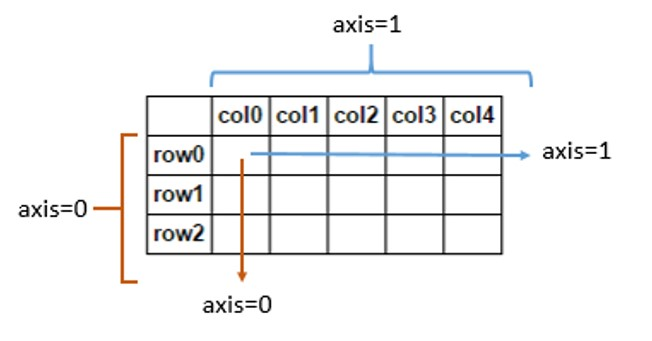

In [75]:
Image(filename='./figures/axis_pandas.jpg')

In [79]:
## Numerical indexing (exclusive [,)])
excel_df.iloc[1,1]

25.537439644379

In [80]:
## Name indexing (inclusive [,])
excel_df.loc['AT3G54530', 'dwf4 +BL vs. dwf4']

25.537439644379

In [81]:
## Name indexing (inclusive [,])
excel_df.loc['AT3G54530':'AT5G20470', 'dwf4 +BL vs. dwf4']

Gene_ID
AT3G54530    25.537440
AT5G20470     9.744589
Name: dwf4 +BL vs. dwf4, dtype: float64

In [82]:
## Numerical indexing (exclusive [,)])
excel_df.iloc[1:2,1]

Gene_ID
AT3G54530    25.53744
Name: dwf4 +BL vs. dwf4, dtype: float64

In [84]:
### Let's subset the dataframe to only contain the columns
### 'Col+BL vs. Col', 'Col+IAA vs. Col', 'Computational_description'

excel_df = excel_df.loc[:, ['Col+BL vs. Col', 'Col+IAA vs. Col', 'Computational_description']]

In [85]:
excel_df.head()

,Col+BL vs. Col,Col+IAA vs. Col,Computational_description
Gene_ID,,,
AT1G30190,0.000000,425.761346,unknown protein
AT3G54530,1.420029,3.565291,unknown protein
AT5G20470,1.578872,1.778351,"myosin, putative"
AT2G23170,1.147703,245.184873,GH3.3
AT1G29860,0.992379,0.574224,WRKY DNA-binding protein 71 (WRKY71)


### Exercise V

* What is the differential expression after IAA treatment of gene 'AT3G46810'
* What is the maximal differential expression of BL treatment.
* What is the BL expression of the 1493 gene.

In [87]:
###Double indexing "and"
excel_df[(excel_df['Col+BL vs. Col'] > 5) & (excel_df['Col+IAA vs. Col'] > 5)]

,Col+BL vs. Col,Col+IAA vs. Col,Computational_description
Gene_ID,,,
AT4G27300,5.236277,39.149841,S-locus lectin protein kinase family protein
AT5G22520,10.470725,32.105759,unknown protein
AT2G19146,6.570213,24.396241,FUNCTIONS IN: molecular_function unknown
AT3G49700,5.825020,15.199336,1-aminocyclopropane-1-carboxylate synthase 9 (...
AT2G17040,5.832065,12.908143,NAC domain containing protein 36 (NAC036)
AT5G07310,5.003708,11.876724,Integrase-type DNA-binding superfamily protein
AT2G27220,8.215217,5.333422,BEL1-like homeodomain 5 (BLH5)
AT2G28671,6.664032,5.153116,unknown protein
AT1G17710,6.476395,8.402895,Pyridoxal phosphate phosphatase-related protein


In [91]:
###Double indexing "or"
excel_df[(excel_df['Col+BL vs. Col'] > 5) | (excel_df['Col+IAA vs. Col'] > 5)]

,Col+BL vs. Col,Col+IAA vs. Col,Computational_description
Gene_ID,,,
AT1G30190,0.000000,425.761346,unknown protein
AT2G23170,1.147703,245.184873,GH3.3
AT1G06920,2.665613,158.041571,ovate family protein 4 (OFP4)
AT4G37290,0.601231,113.163553,unknown protein
AT1G74670,0.446195,99.836051,Gibberellin-regulated family protein
...,...,...,...
AT2G37740,8.391748,5.366633,zinc-finger protein 10 (ZFP10)
AT3G55970,7.537798,0.741648,jasmonate-regulated gene 21 (JRG21)
AT3G15670,0.336104,8.897547,Late embryogenesis abundant protein (LEA) fami...


### Exercise VI

* How many genes are upregulated at both conditions.
* How many genes are upgregulated in one condition only.
* Do you think the overlap or exclusion is significant and what test could you use to test for this.


In [105]:
###Sort values
excel_df.sort_values('Col+IAA vs. Col')

,Col+BL vs. Col,Col+IAA vs. Col,Computational_description
Gene_ID,,,
AT5G46900,1.483836,0.004045,Bifunctional inhibitor/lipid-transfer protein/...
AT5G23660,1.206841,0.007190,homolog of Medicago truncatula MTN3 (MTN3)
AT1G02575,0.683715,0.008310,NaN
AT5G46890,1.102536,0.009498,Bifunctional inhibitor/lipid-transfer protein/...
AT1G05650,0.931931,0.009939,Pectin lyase-like superfamily protein
...,...,...,...
AT1G74670,0.446195,99.836051,Gibberellin-regulated family protein
AT4G37290,0.601231,113.163553,unknown protein
AT1G06920,2.665613,158.041571,ovate family protein 4 (OFP4)


In [95]:
###Sort values
excel_df.sort_values('Col+IAA vs. Col', ascending=False, inplace=True)

In [103]:
###let's look at the top 100 differentially expressed (>5) expressed genes after IAA treatment
###that are also differentially expressed in BL conditions.
sub_excel_df = excel_df[(excel_df['Col+BL vs. Col'] > 5) | (excel_df['Col+IAA vs. Col'] > 5)].iloc[:100,:]

In [101]:
sub_excel_df.head()

,Col+BL vs. Col,Col+IAA vs. Col,Computational_description
Gene_ID,,,
AT1G30190,0.000000,425.761346,unknown protein
AT2G23170,1.147703,245.184873,GH3.3
AT1G06920,2.665613,158.041571,ovate family protein 4 (OFP4)
AT4G37290,0.601231,113.163553,unknown protein
AT1G74670,0.446195,99.836051,Gibberellin-regulated family protein


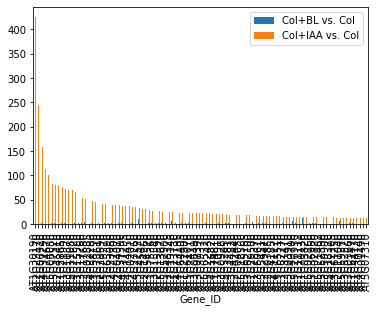

In [102]:
###Sort values
sub_excel_df.plot.bar()